In [2]:
import pandas as pd
import numpy as np 
from helpers2 import S3Connection
import helpers2 
import matplotlib.pyplot as plt

In [5]:
s3 = S3Connection(bucket_name="clichere/diffusion")

Connection successful


## Ouverture des données

In [9]:
path_logements_existants = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-existants.csv"
DPE_logements_existants = s3.read_csv_from_s3(path_logements_existants)
DPE_logements_existants

Error reading file from S3: clichere/diffusion/clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-existants.csv


In [10]:
path_logements_neufs = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-neufs.csv"
DPE_logements_neufs = s3.get_tables_from_s3(path_logements_neufs)
DPE_logements_neufs

Error reading Parquet file from S3: clichere/diffusion/clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-neufs.csv


In [ ]:
path_valeursfoncieres_2022 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2022.txt"
vf2022 = s3.read_file_from_s3(path_valeursfoncieres_2022, sep="|")

path_valeursfoncieres_2021 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2021.txt"
vf2021 = s3.read_file_from_s3(path_valeursfoncieres_2021, sep="|")

path_valeursfoncieres_2020 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2020.txt"
vf2020 = s3.read_file_from_s3(path_valeursfoncieres_2020, sep="|")

path_valeursfoncieres_2019 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2019.txt"
vf2019 = s3.read_file_from_s3(path_valeursfoncieres_2019, sep="|")

path_valeursfoncieres_2018 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2018.txt"
vf2018 = s3.read_file_from_s3(path_valeursfoncieres_2018, sep="|")

path_valeursfoncieres_2017 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2017.txt"
vf2017 = s3.read_file_from_s3(path_valeursfoncieres_2017, sep="|")

path_valeursfoncieres_2016 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2016.txt"
vf2016 = s3.read_file_from_s3(path_valeursfoncieres_2016, sep="|")

path_valeursfoncieres_2015 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2015.txt"
vf2015 = s3.read_file_from_s3(path_valeursfoncieres_2015, sep="|")

path_valeursfoncieres_2014 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2014.txt"
vf2014 = s3.read_file_from_s3(path_valeursfoncieres_2014, sep="|")


/home/onyxia/work/STATAPP-2/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP-2/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP-2/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP-2/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/ho

In [ ]:
vf = pd.concat([vf2022, vf2021, vf2020, vf2019, vf2018, vf2017, vf2016, vf2015, vf2014], ignore_index=True)
vf.head()
vf.info()  
vf.columns  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30515651 entries, 0 to 30515650
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune       

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain', 'Code service CH'],
      dtype='object')

In [ ]:
vf['Date mutation'] = pd.to_datetime(vf['Date mutation'], errors='coerce')
vf['Valeur fonciere'] = pd.to_numeric(vf['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
vf['Code postal'] = vf['Code postal'].astype(str).str.zfill(5)  
vf['Code departement'] = vf['Code departement'].astype(str).str.zfill(2)  

## **Première analyse des données**

#### **Evaluation des données manquantes dans les bases DPE**

In [ ]:
print("Nombre de lignes par colonnes:", len(DPE_logements_existants))
total_nan = DPE_logements_existants.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = DPE_logements_existants.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 4537525
Nombre total de NaN : 17334637
Les 10 colonnes avec le plus de NaN :
Cage_d'escalier                  4473586
Nom_résidence                    4187600
Complément_d'adresse_bâtiment    2567157
Complément_d'adresse_logement    2195128
Année_construction               1484043
N°_étage_appartement             1145452
N°_voie_(BAN)                     630304
Nom__rue_(BAN)                    347796
Surface_habitable_logement         52267
Adresse_(BAN)                      29373
dtype: int64


In [ ]:
print("Nombre de lignes par colonnes:", len(DPE_logements_neufs))
total_nan = DPE_logements_neufs.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = DPE_logements_neufs.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 537952
Nombre total de NaN : 2590459
Les 10 colonnes avec le plus de NaN :
Cage_d'escalier                  533124
Nom_résidence                    500611
Complément_d'adresse_bâtiment    451278
N°_étage_appartement             395375
Complément_d'adresse_logement    298515
N°_voie_(BAN)                    283875
Nom__rue_(BAN)                    84559
N°_département_(BAN)               4253
N°_région_(BAN)                    4253
Surface_habitable_logement         4053
dtype: int64


In [ ]:
print("Nombre de lignes par colonnes:", len(vf))
total_nan = vf.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = vf.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 30515651
Nombre total de NaN : 800706572
Les 10 colonnes avec le plus de NaN :
Identifiant de document       30515651
Reference document            30515651
1 Articles CGI                30515651
2 Articles CGI                30515651
3 Articles CGI                30515651
4 Articles CGI                30515651
5 Articles CGI                30515651
Identifiant local             30515651
Code service CH               30515651
Surface Carrez du 5eme lot    30508017
dtype: int64


### **Statistiques descriptives des bases DPE logements existants et neufs**
##### **Répartition des étiquettes DPE dans les deux bases de données**

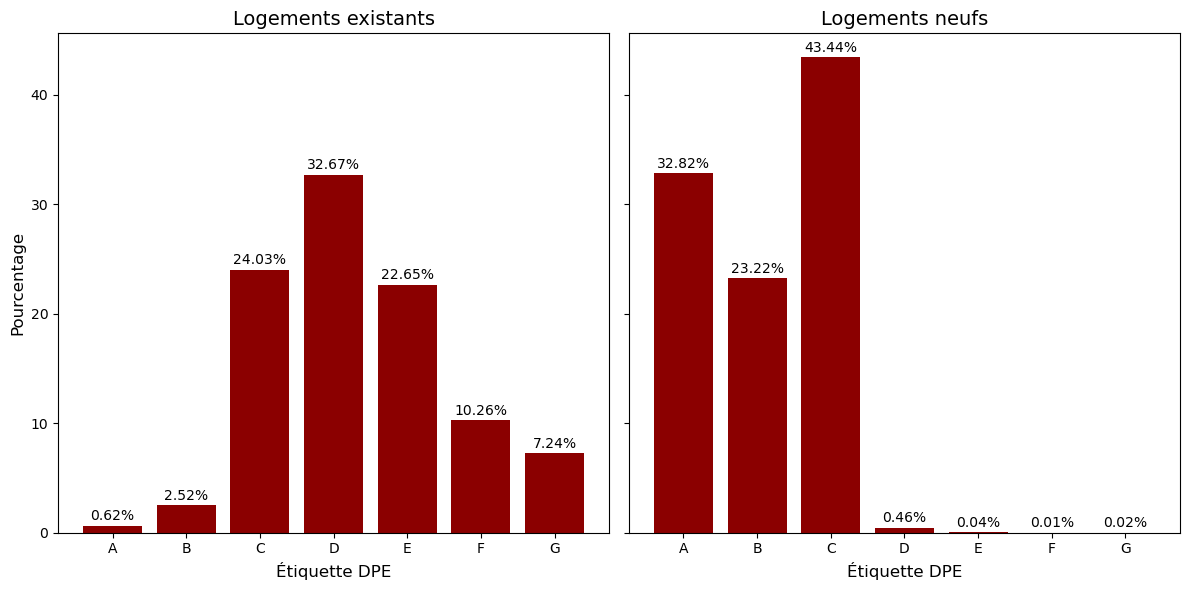

In [ ]:
resultat_dpe_existants = DPE_logements_existants["Etiquette_DPE"].value_counts(normalize=True) * 100
resultat_dpe_neufs = DPE_logements_neufs["Etiquette_DPE"].value_counts(normalize=True) * 100

resultat_dpe_existants = resultat_dpe_existants.reindex(sorted(resultat_dpe_existants.index))
resultat_dpe_neufs = resultat_dpe_neufs.reindex(sorted(resultat_dpe_neufs.index))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Histogramme pour les logements existants
axes[0].bar(resultat_dpe_existants.index, resultat_dpe_existants.values, color='darkred')
axes[0].set_title("Logements existants", fontsize=14)
axes[0].set_xlabel("Étiquette DPE", fontsize=12)
axes[0].set_ylabel("Pourcentage", fontsize=12)
axes[0].set_xticks(range(len(resultat_dpe_existants.index)))
axes[0].set_xticklabels(resultat_dpe_existants.index)
for i, v in enumerate(resultat_dpe_existants):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Histogramme pour les logements neufs
axes[1].bar(resultat_dpe_neufs.index, resultat_dpe_neufs.values, color='darkred')
axes[1].set_title("Logements neufs", fontsize=14)
axes[1].set_xlabel("Étiquette DPE", fontsize=12)
axes[1].set_xticks(range(len(resultat_dpe_neufs.index)))
axes[1].set_xticklabels(resultat_dpe_neufs.index)
for i, v in enumerate(resultat_dpe_neufs):
    axes[1].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Parmi les logements existants, 32.67% ont un diagnostic de performance énergétique D, soit une consommation allant de 181 à 250 kWh/m²/an. Seulement 0.67% ont un diagnostic de performance énergétique A, soit une consommation inférieure à 70 kWh/m²/an.  

On observe une forte concentration des logements existants dans les classes C, D et E, représentant ensemble près de 80% du parc immobilier. En revanche, les classes les plus énergivores (F et G) restent minoritaires mais non négligeables, avec respectivement 10.26% et 7.24% des logements.  

Pour les logements neufs, la répartition est très différente : une nette majorité d'entre eux sont classés A (32.82%), B (23.22%) et surtout C (43.44%), témoignant des exigences récentes en matière de performance énergétique. Les logements classés D et au-delà sont quasi inexistants, confirmant que les nouvelles constructions répondent à des normes beaucoup plus strictes en matière d'efficacité énergétique.

##### **Répartition des étiquettes DPE dans chaque département : logements existants**
Nous avons fait le choix de filtrer les données pour les codes départements allant de 01 à 101 et d'éliminer les quelques logements dont les informations étaient erronées.

In [ ]:
DPE_logements_existants["N°_département_(BAN)"] = pd.to_numeric(DPE_logements_existants["N°_département_(BAN)"], errors="coerce")
DPE_filtre101 = DPE_logements_existants[DPE_logements_existants["N°_département_(BAN)"] <= 101]
DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = DPE_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)

# Trouver le département avec le plus de logements en A et G
logements_A = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "A"]
logements_G = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

/tmp/ipykernel_194926/3923889252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)


Etiquette_DPE            A     B      C      D      E      F      G
N°_département_(BAN)                                               
01                   0.80% 2.61% 23.87% 33.95% 21.78%  9.96%  7.04%
02                   0.11% 0.87% 11.60% 29.81% 31.61% 14.92% 11.07%
03                   0.54% 3.17% 16.22% 28.77% 23.89% 14.60% 12.80%
04                   0.13% 1.22%  9.37% 23.38% 31.13% 17.28% 17.49%
05                   0.10% 0.73%  5.56% 20.51% 39.29% 17.68% 16.13%
...                    ...   ...    ...    ...    ...    ...    ...
91                   0.17% 1.57% 28.65% 34.57% 20.75%  8.59%  5.71%
92                   0.13% 1.35% 19.37% 29.42% 25.82% 12.34% 11.57%
93                   0.04% 1.38% 25.07% 32.43% 23.12%  9.73%  8.23%
94                   0.10% 2.44% 23.67% 29.82% 25.13% 11.25%  7.58%
95                   0.13% 1.58% 25.29% 33.26% 23.06% 10.27%  6.41%

[94 rows x 7 columns]
Le département avec le plus de logements en A : 13 (2148 logements)
Le département avec le pl

/tmp/ipykernel_194926/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_194926/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_194926/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

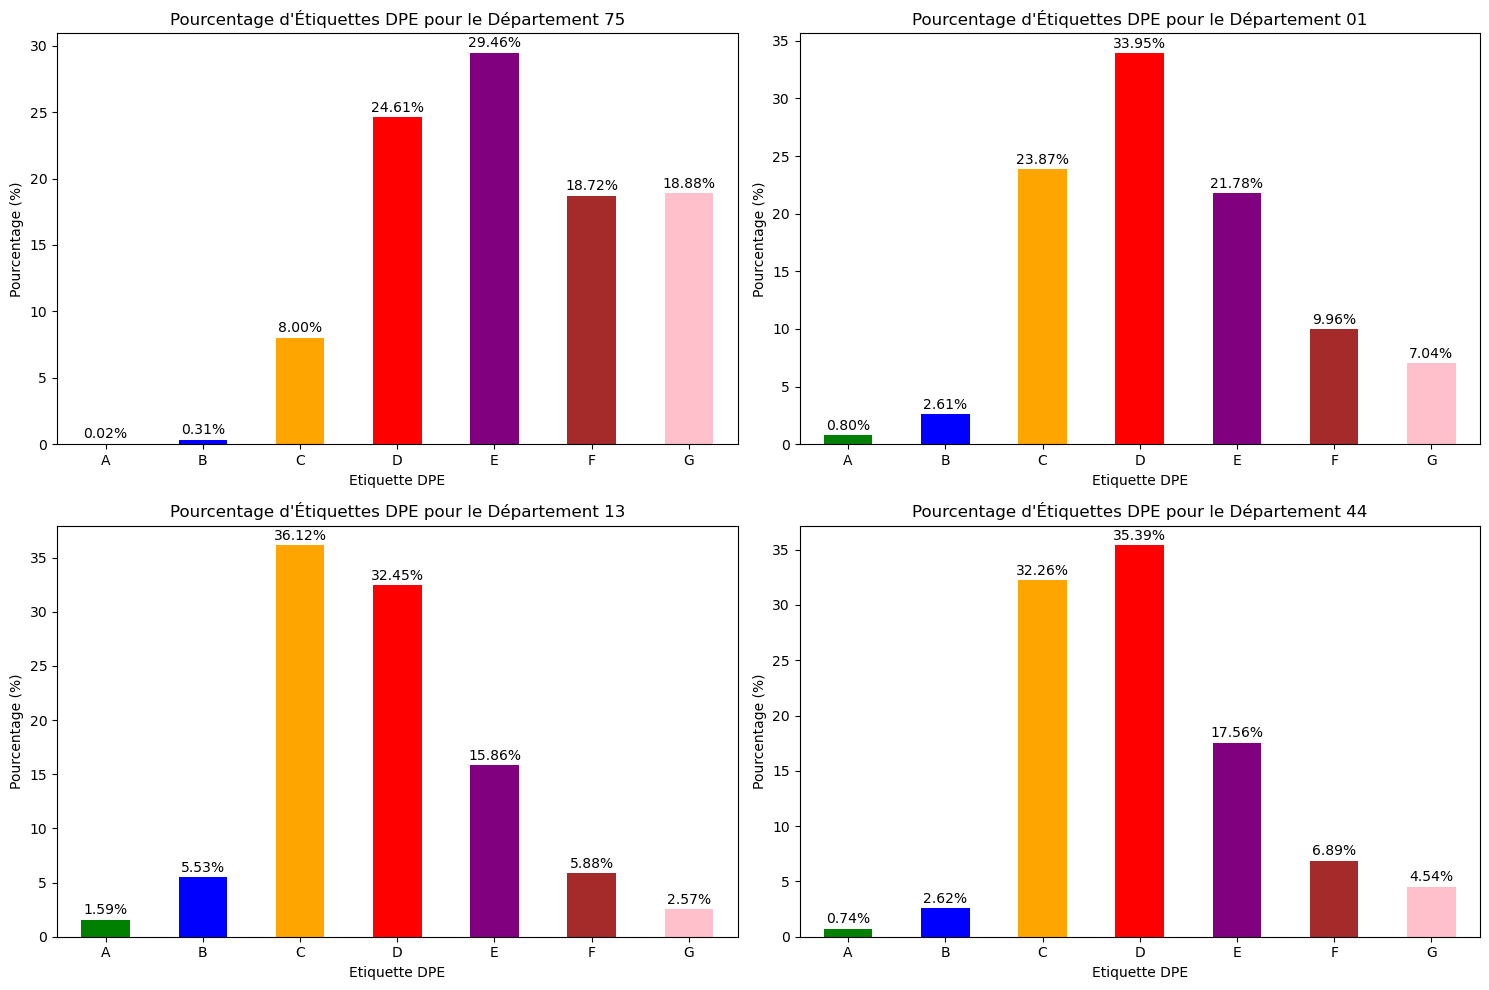

In [ ]:
departements = ["75", "01", "13", "44"]

# Histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  
    resultat_dep = resultat.loc[dep]  
    
    # Histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Les graphiques montre des disparités marquées entre les départements en matière de performance énergétique des logements. Le département 75 (Paris) se distingue par la plus forte proportion de logements classés G, soulignant un parc immobilier ancien et énergivore. À l’inverse, le département 13 (Bouches-du-Rhône) est celui qui compte le plus de logements en A, indiquant une meilleure efficacité énergétique pour une partie du parc. Dans l’ensemble, les étiquettes C, D et E sont les plus répandues dans tous les départements, ce qui reflète une performance moyenne. Le 01 (Ain) et le 44 (Loire-Atlantique) présentent des distributions plus équilibrées, avec une dominance des classes C et D. Ces résultats mettent en évidence des écarts significatifs entre les territoires, qui peuvent être liés à l’âge des bâtiments, aux politiques locales de rénovation et aux différences climatiques.

##### **Répartition des étiquettes DPE dans chaque département : logements neufs**


In [ ]:
DPE_logements_neufs["N°_département_(BAN)"] = pd.to_numeric(DPE_logements_neufs["N°_département_(BAN)"], errors="coerce")
DPE_filtre101_neuf = DPE_logements_neufs[DPE_logements_neufs["N°_département_(BAN)"] <= 101]
DPE_filtre101_neuf["N°_département_(BAN)"] = DPE_filtre101_neuf["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = DPE_filtre101_neuf.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)

# Trouver le département avec le plus de logements en A et G
logements_A = DPE_filtre101_neuf[DPE_filtre101_neuf["Etiquette_DPE"] == "A"]
logements_G = DPE_filtre101_neuf[DPE_filtre101_neuf["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

/tmp/ipykernel_194926/365919536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPE_filtre101_neuf["N°_département_(BAN)"] = DPE_filtre101_neuf["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)


Etiquette_DPE             A      B      C     D     E     F     G
N°_département_(BAN)                                             
01                   27.86% 15.08% 56.66% 0.20% 0.16%   NaN 0.03%
02                   28.78% 35.61% 35.29% 0.32%   NaN   NaN   NaN
03                   58.57% 15.67% 25.50% 0.13%   NaN 0.13%   NaN
04                   41.96% 47.23% 10.64%   NaN   NaN 0.09% 0.09%
05                   25.76% 38.88% 34.26% 0.97% 0.12%   NaN   NaN
...                     ...    ...    ...   ...   ...   ...   ...
91                   15.95% 25.24% 58.77% 0.01% 0.02% 0.01% 0.01%
92                   12.37% 17.48% 68.76% 1.30% 0.07% 0.00% 0.02%
93                   11.08% 24.15% 64.30% 0.45% 0.00%   NaN 0.01%
94                    6.94% 31.67% 58.30% 3.04% 0.01% 0.02% 0.02%
95                    9.61% 25.91% 64.19% 0.27% 0.01%   NaN 0.01%

[94 rows x 7 columns]
Le département avec le plus de logements en A : 13 (11312 logements)
Le département avec le plus de logements en G : 33

/tmp/ipykernel_194926/1878433699.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_194926/1878433699.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_194926/1878433699.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

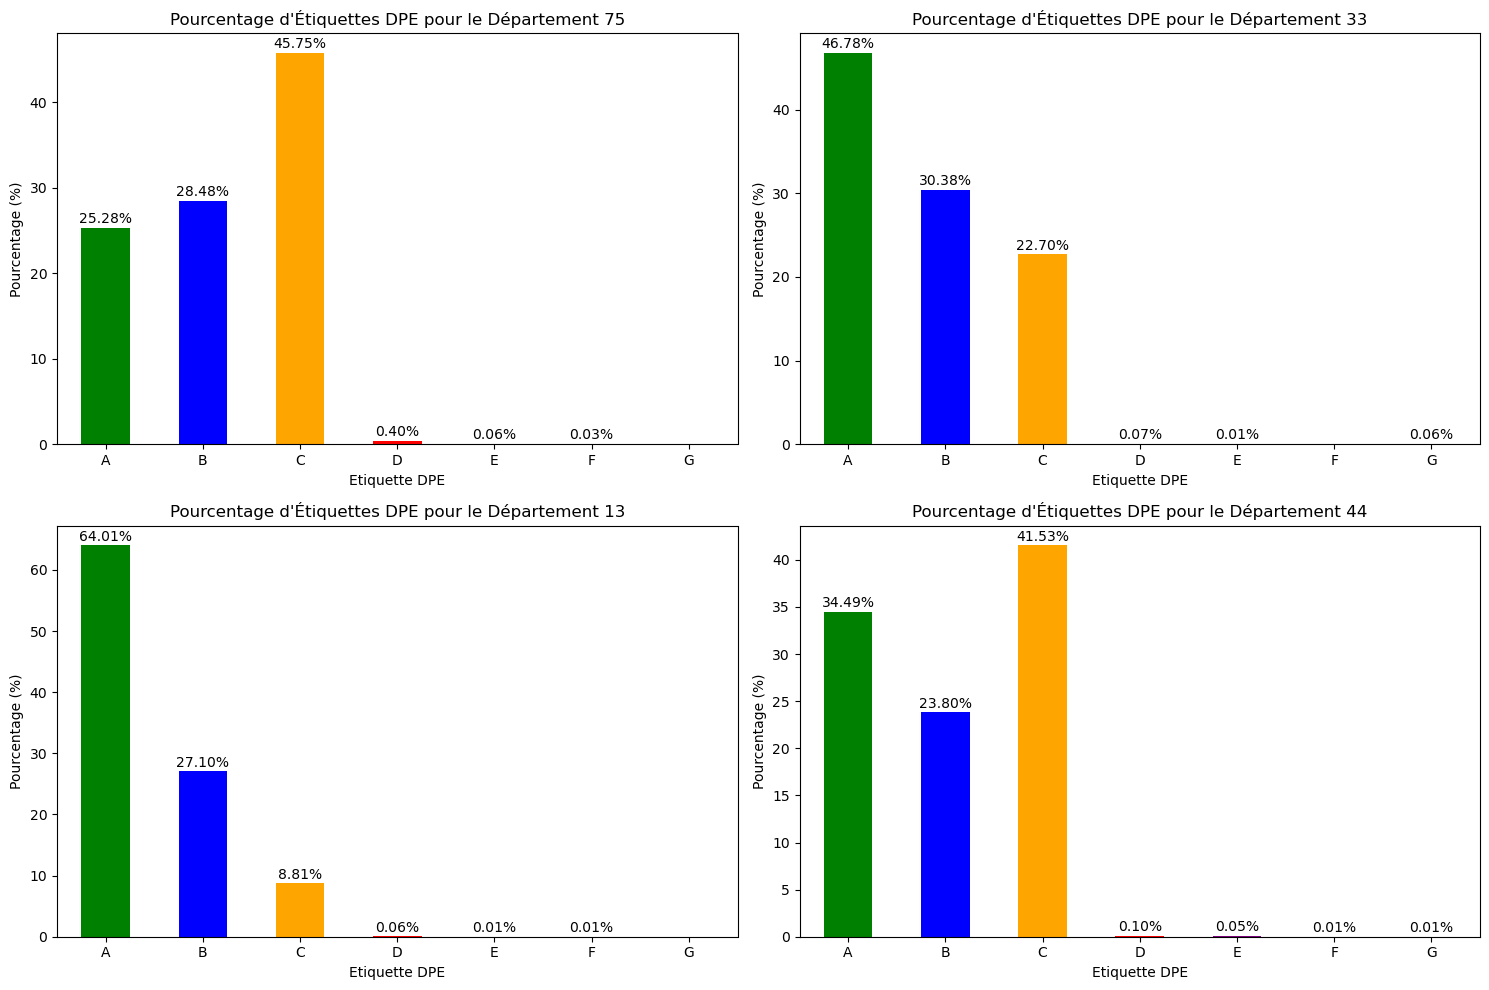

In [ ]:
departements = ["75", "33", "13", "44"]

# Histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  
    resultat_dep = resultat.loc[dep]  
    
    # Histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Les départements analysés (75, 33, 13 et 44) comptent une majorité de logements bien classés, notamment en A, B et C. Contrairement aux graphiques précédents où les étiquettes D, E et F étaient dominantes, ces départements affichent des proportions très faibles de logements énergivores (D, E, F et G sont presque absents).

Le département 13 (Bouches-du-Rhône) se démarque encore avec la plus forte proportion de logements classés A (64.01%), renforçant son image de parc immobilier plus performant énergétiquement. De même, le 33 (Gironde) et le 44 (Loire-Atlantique) présentent des proportions élevées de logements classés A et B, confirmant une meilleure efficacité énergétique globale. Le 33 (Gironde) est le département qui compte le plus de logement neuf avec l'étiquette G. Paris (75), qui dans l'autre graphique montrait une forte proportion de logements classés G, affiche ici une majorité en C (45.75%), ce qui suggère que les logements neufs ou rénovés y sont bien plus performants que le parc immobilier ancien.

Cette comparaison illustre bien la différence entre les logements existants et les logements plus récents ou rénovés : les premiers souffrent souvent d’une moindre efficacité énergétique, tandis que les seconds bénéficient de meilleures normes et réglementations thermiques.

##### **Répartition des étiquettes DPE par type de bâtiment :**

Étude de la répartition des types de bâtiments parmi tous les logements et comparaison des étiquettes DPE par type de bâtiment. 

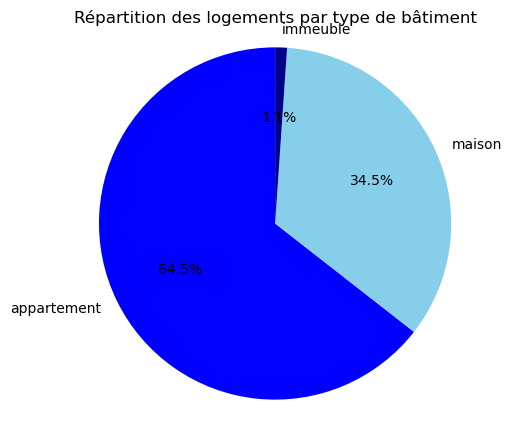

Pourcentages d'étiquettes DPE par type de bâtiment:
Etiquette_DPE     A     B      C      D      E      F     G
Type_bâtiment                                              
appartement   0.30% 2.14% 26.85% 33.81% 21.92%  8.91% 6.07%
immeuble      0.23% 2.21% 36.06% 33.85% 17.94%  6.38% 3.33%
maison        1.25% 3.26% 18.39% 30.51% 24.16% 12.90% 9.53%

Le type de bâtiment avec le plus de logements en A : maison (19556 logements)
Le type de bâtiment avec le plus de logements en E : appartement (641201 logements)


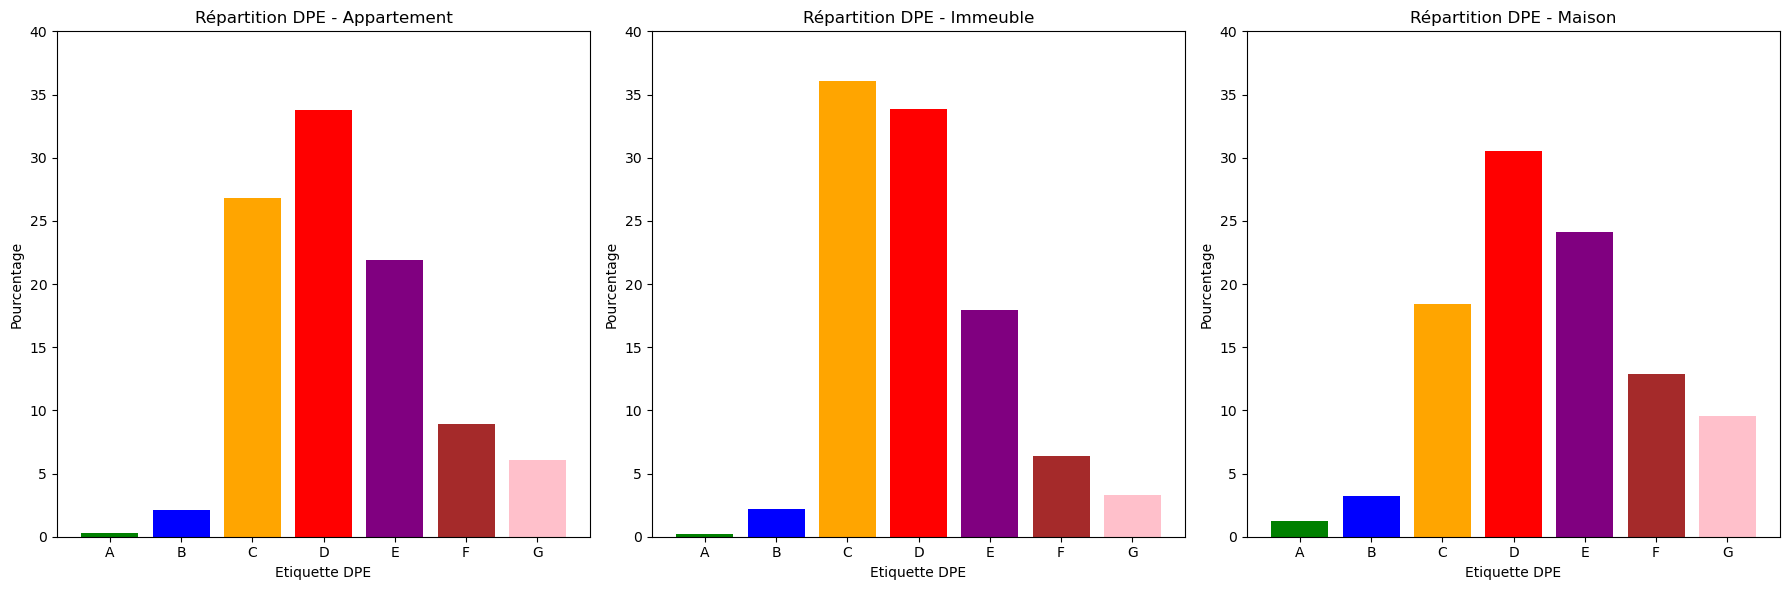

In [ ]:
repartition_batiment = DPE_logements_existants['Type_bâtiment'].value_counts()

# Camembert
plt.figure(figsize=(5, 5))
plt.pie(repartition_batiment, labels=repartition_batiment.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'skyblue', 'darkblue'])
plt.title("Répartition des logements par type de bâtiment")
plt.axis('equal') 
plt.show()

# Filtrer les données par 'Type_batiment' et 'Etiquette_DPE'
resultat_batiment = DPE_logements_existants.groupby(['Type_bâtiment', 'Etiquette_DPE']).size().unstack(fill_value=0)
resultat_batiment_percentage = (resultat_batiment.T / resultat_batiment.sum(axis=1)).T * 100
print("Pourcentages d'étiquettes DPE par type de bâtiment:")
print(resultat_batiment_percentage)

# Bâtiment avec le plus de logements en A et en E
logements_A_batiment = DPE_logements_existants[DPE_logements_existants["Etiquette_DPE"] == "A"]
logements_A_batiment_count = logements_A_batiment.groupby("Type_bâtiment").size()
logements_E_batiment = DPE_logements_existants[DPE_logements_existants["Etiquette_DPE"] == "E"]
logements_E_batiment_count = logements_E_batiment.groupby("Type_bâtiment").size()
type_batiment_max_A = logements_A_batiment_count.idxmax()
type_batiment_max_E = logements_E_batiment_count.idxmax()
print(f"\nLe type de bâtiment avec le plus de logements en A : {type_batiment_max_A} ({logements_A_batiment_count.max()} logements)")
print(f"Le type de bâtiment avec le plus de logements en E : {type_batiment_max_E} ({logements_E_batiment_count.max()} logements)")

# Histogrammes pour chaque type de bâtiment
types_batiment = ['appartement', 'immeuble', 'maison']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, batiment in enumerate(types_batiment):
    data = resultat_batiment_percentage.loc[batiment]
    axes[i].bar(data.index, data.values, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    axes[i].set_title(f"Répartition DPE - {batiment.capitalize()}")
    axes[i].set_xlabel("Etiquette DPE")
    axes[i].set_ylabel("Pourcentage")
    axes[i].set_ylim(0, 40)  
    axes[i].tick_params(axis='x', rotation=0)  
plt.tight_layout()
plt.show()

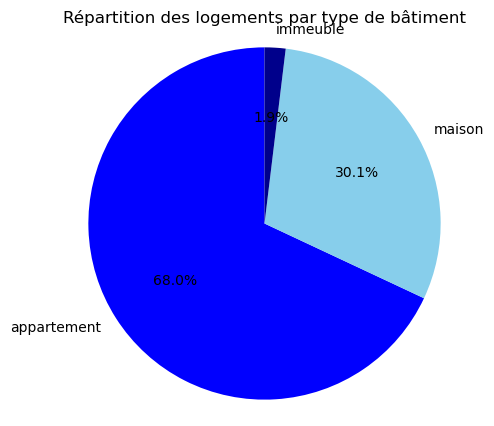

Pourcentages d'étiquettes DPE par type de bâtiment:
Etiquette_DPE      A      B      C     D     E     F     G
Type_bâtiment                                             
appartement   16.31% 25.94% 57.06% 0.63% 0.04% 0.01% 0.01%
immeuble      16.76% 26.53% 54.66% 0.83% 0.50% 0.22% 0.49%
maison        71.22% 16.85% 11.88% 0.04% 0.01% 0.00% 0.00%

Le type de bâtiment avec le plus de logements en A : maison (115142 logements)
Le type de bâtiment avec le plus de logements en E : appartement (139 logements)


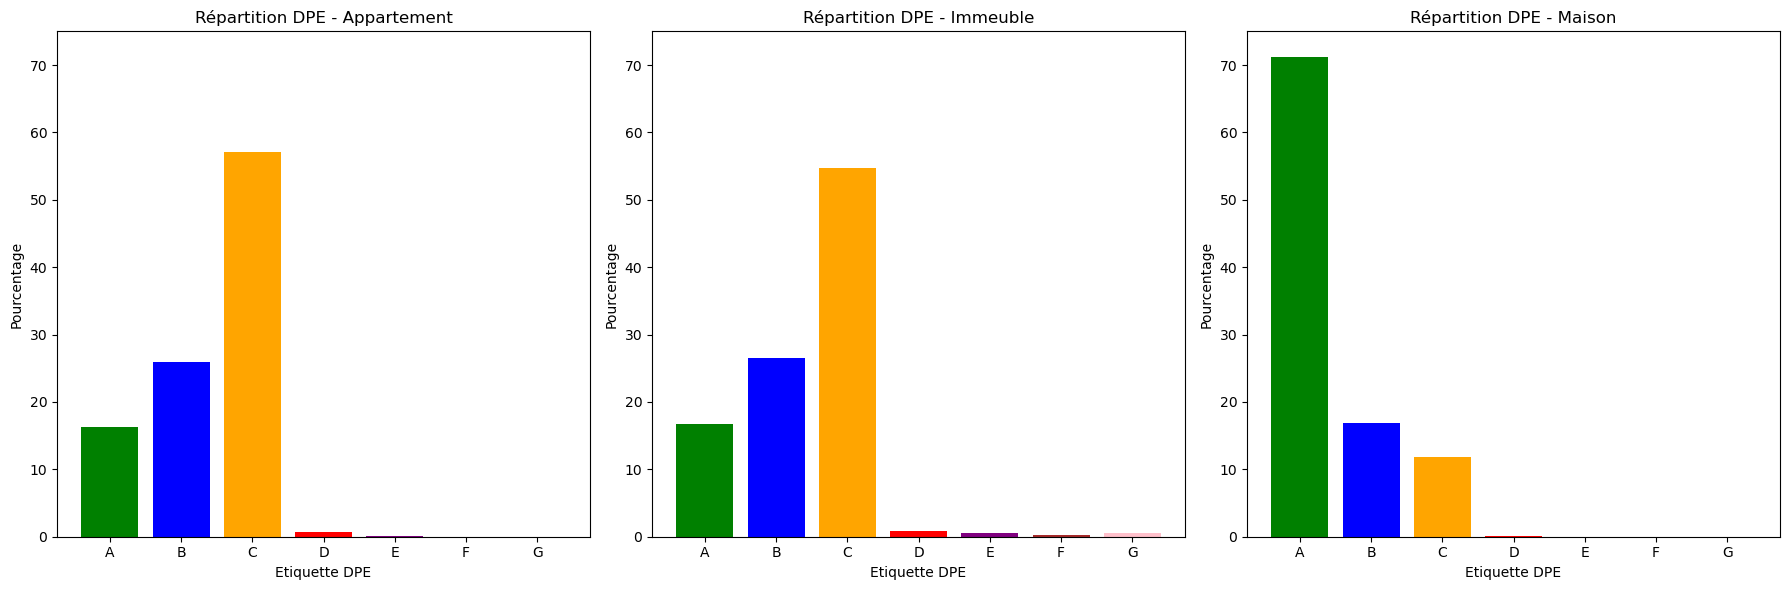

In [ ]:
repartition_batiment = DPE_logements_neufs['Type_bâtiment'].value_counts()

# Camembert
plt.figure(figsize=(5, 5))
plt.pie(repartition_batiment, labels=repartition_batiment.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'skyblue', 'darkblue'])
plt.title("Répartition des logements par type de bâtiment")
plt.axis('equal') 
plt.show()

# Filtrer les données par 'Type_batiment' et 'Etiquette_DPE'
resultat_batiment = DPE_logements_neufs.groupby(['Type_bâtiment', 'Etiquette_DPE']).size().unstack(fill_value=0)
resultat_batiment_percentage = (resultat_batiment.T / resultat_batiment.sum(axis=1)).T * 100
print("Pourcentages d'étiquettes DPE par type de bâtiment:")
print(resultat_batiment_percentage)

# Bâtiment avec le plus de logements en A et en E
logements_A_batiment = DPE_logements_neufs[DPE_logements_neufs["Etiquette_DPE"] == "A"]
logements_A_batiment_count = logements_A_batiment.groupby("Type_bâtiment").size()
logements_E_batiment = DPE_logements_neufs[DPE_logements_neufs["Etiquette_DPE"] == "E"]
logements_E_batiment_count = logements_E_batiment.groupby("Type_bâtiment").size()
type_batiment_max_A = logements_A_batiment_count.idxmax()
type_batiment_max_E = logements_E_batiment_count.idxmax()
print(f"\nLe type de bâtiment avec le plus de logements en A : {type_batiment_max_A} ({logements_A_batiment_count.max()} logements)")
print(f"Le type de bâtiment avec le plus de logements en E : {type_batiment_max_E} ({logements_E_batiment_count.max()} logements)")

# Histogrammes pour chaque type de bâtiment
types_batiment = ['appartement', 'immeuble', 'maison']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, batiment in enumerate(types_batiment):
    data = resultat_batiment_percentage.loc[batiment]
    axes[i].bar(data.index, data.values, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    axes[i].set_title(f"Répartition DPE - {batiment.capitalize()}")
    axes[i].set_xlabel("Etiquette DPE")
    axes[i].set_ylabel("Pourcentage")
    axes[i].set_ylim(0, 75)  
    axes[i].tick_params(axis='x', rotation=0)  
plt.tight_layout()
plt.show()

### **Valeurs foncières : Analyse des transactions immobilières**

In [ ]:
# Suppression des valeurs aberrantes (exclure les 1% les plus élevés)
q99 = vf['Valeur fonciere'].quantile(0.99)
vf_filtre = vf[vf['Valeur fonciere'] <= q99]

: 

#### **Distribution des prix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(vf_filtre['Valeur fonciere'].dropna(), bins=100, kde=True)
plt.xlim(0, vf_filtre['Valeur fonciere'].quantile(0.99))  # Éviter les outliers extrêmes
plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions")
plt.title("Distribution des prix de vente")
plt.show()


##### **Analyse des prix en fonction des départements : top 10 des départements les plus chers**

In [ ]:
prix_par_departement = vf_filtre.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False)
print(prix_par_departement.head(10))  

Code departement
39   24458064.03%
92    6317782.15%
94    6311078.91%
51    4449296.90%
69    4242246.85%
75    3757533.07%
95    2793606.90%
93    2615968.35%
91    2277634.06%
59    2145228.49%
Name: Valeur fonciere, dtype: float64
